
Clasificador inteligente de materiales reciclables
Contexto:
Imagina que trabajas para una empresa de reciclaje inteligente.

Tu tarea consiste en diseñar un sistema que pueda predecir automáticamente si un objeto es plástico, metal o papel, a partir de sus propiedades físicas, usando el algoritmo de k vecinos más cercanos (KNN).

Vas a utilizar Python con las librerías numpy, pandas, matplotlib y sklearn para entrenar y visualizar el modelo.



📦 Objetivo

Implementa las siguientes clases:

1. RecyclableItem

Representa un objeto reciclable con tres atributos:

weight: peso del objeto en gramos.

volume: volumen en cm³.

material_type: tipo de material codificado como:

0 para plástico

1 para metal

2 para papel

Método necesario:

to_vector(self): devuelve [weight, volume], útil para alimentar el modelo.



2. RecyclableDataGenerator

Genera objetos sintéticos para entrenar el modelo.

Constructor:

num_samples: número total de objetos a generar (repartidos entre los tres tipos de material).

Método:

generate(self): genera y devuelve una lista de objetos RecyclableItem con las siguientes características:

Plástico (0):

Peso: entre 80 y 120 g

Volumen: entre 90 y 130 cm³

Metal (1):

Peso: entre 180 y 220 g

Volumen: entre 70 y 110 cm³

Papel (2):

Peso: entre 40 y 70 g

Volumen: entre 120 y 160 cm³



3. RecyclableMaterialClassifier

Clasificador que entrena un modelo de KNN.

Métodos:

fit(records): entrena el modelo con una lista de objetos RecyclableItem.

predict(weight, volume): devuelve el tipo de material predicho (0, 1 o 2) para un nuevo objeto.

evaluate(records): imprime métricas de clasificación (classification_report, confusion_matrix) con un conjunto de prueba.



4. RecyclablePredictionExample

Clase que coordina todo el flujo:

Genera los datos.

Separa en entrenamiento y prueba.

Entrena el clasificador.

Evalúa el rendimiento.

Hace una predicción para un nuevo objeto (por ejemplo, peso = 110, volumen = 105).

Visualiza los datos y las predicciones en un gráfico 2D con colores distintos para cada tipo de material.



✅ Ejemplo de uso

example = RecyclablePredictionExample()
example.run()


Salida esperada

[[10  0  0]
 [ 0 18  0]
 [ 0  0 17]]
              precision    recall  f1-score   support
 
           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        17
 
    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 
 
📦 Predicción para un nuevo objeto:
   Peso: 60g, Volumen: 180cm³
   Tipo estimado: Plástico



Matriz de confusión:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Predicción: 60g, 180cm³ → Papel


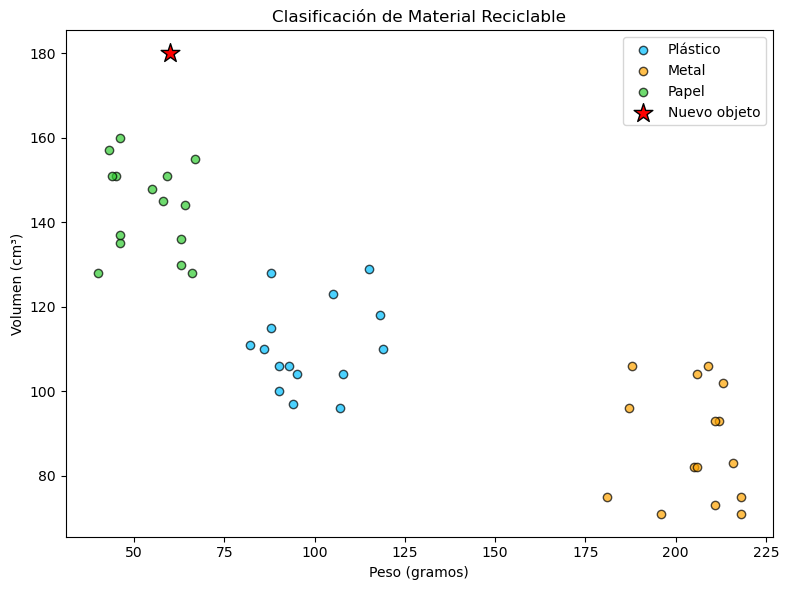

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1. Clase del objeto reciclable (sin cambios)
class RecyclableItem:
    def __init__(self, weight, volume, material_type):
        self.weight = weight
        self.volume = volume
        self.material_type = material_type  # 0 = plástico, 1 = metal, 2 = papel

    def to_vector(self):
        return [self.weight, self.volume]


# 2. Generador de datos modificado (usar enteros como el Código 2)
class RecyclingDataGenerator:
    def __init__(self, num_samples=135):  # Muestra total 135 como en Código 2
        self.num_samples = num_samples

    def generate(self):
        np.random.seed(42)  # Mantenemos semilla para reproducibilidad
        items = []
        n = self.num_samples // 3

        # Plástico (0) - Rangos del Código 2
        items += [RecyclableItem(
            weight=np.random.randint(80, 121),
            volume=np.random.randint(90, 131),
            material_type=0
        ) for _ in range(n)]

        # Metal (1) - Rangos del Código 2
        items += [RecyclableItem(
            weight=np.random.randint(180, 221),
            volume=np.random.randint(70, 111),
            material_type=1
        ) for _ in range(n)]

        # Papel (2) - Rangos del Código 2
        items += [RecyclableItem(
            weight=np.random.randint(40, 71),
            volume=np.random.randint(120, 161),
            material_type=2
        ) for _ in range(self.num_samples - 2 * n)]

        np.random.shuffle(items)  # Mezclar como en Código 2
        return items


# 3. Clasificador KNN con parámetros del Código 2
class RecyclableMaterialClassifier:
    def __init__(self, k=3):  # k=3 y distancia Euclidiana (default)
        self.model = KNeighborsClassifier(n_neighbors=k)

    def fit(self, records):
        X = np.array([item.to_vector() for item in records])
        y = np.array([item.material_type for item in records])
        self.model.fit(X, y)

    def predict(self, weight, volume):
        return self.model.predict([[weight, volume]])[0]

    def evaluate(self, records):
        X = np.array([item.to_vector() for item in records])
        y_true = np.array([item.material_type for item in records])
        y_pred = self.model.predict(X)

        print("Matriz de confusión:")
        print(confusion_matrix(y_true, y_pred))
        print("\nReporte de clasificación:")
        print(classification_report(y_true, y_pred, digits=2))


# 4. Clase principal ajustada
class RecyclablePredictionExample:
    def run(self):
        generator = RecyclingDataGenerator()
        items = generator.generate()

        # Test size 33.3% como en Código 2
        train_items, test_items = train_test_split(
            items,
            test_size=0.333,  # 1/3 = ~33.3%
            stratify=[item.material_type for item in items],
            random_state=42
        )

        classifier = RecyclableMaterialClassifier(k=3)
        classifier.fit(train_items)
        classifier.evaluate(test_items)

        # Predicción del Código 2 (60g, 180cm³)
        test_weight, test_volume = 60, 180
        predicted = classifier.predict(test_weight, test_volume)
        nombres = {0: 'Plástico', 1: 'Metal', 2: 'Papel'}
        print(f"\nPredicción: {test_weight}g, {test_volume}cm³ → {nombres[predicted]}")

        # Visualización estilo Código 2
        colores = ['deepskyblue', 'orange', 'limegreen']
        df = pd.DataFrame({
            "Peso": [item.weight for item in test_items],
            "Volumen": [item.volume for item in test_items],
            "Tipo": [item.material_type for item in test_items]
        })

        plt.figure(figsize=(8, 6))
        for tipo in [0, 1, 2]:
            subset = df[df["Tipo"] == tipo]
            plt.scatter(subset.Peso, subset.Volumen,
                        c=colores[tipo],
                        label=nombres[tipo],
                        alpha=0.7,
                        edgecolors='k')

        plt.scatter(test_weight, test_volume, c='red', marker='*',
                    s=200, label='Nuevo objeto', edgecolors='k')
        plt.title("Clasificación de Material Reciclable")
        plt.xlabel("Peso (gramos)"), plt.ylabel("Volumen (cm³)")
        plt.legend()
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    example = RecyclablePredictionExample()
    example.run()